In [1]:
import zipfile
import numpy
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt 

In [2]:
# SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.declarative import declarative_base

In [3]:
# File to load
zf = zipfile.ZipFile('Dataset/assembled-workers-compensation-claims-beginning-2000.zip')

# Read the file in
wc_data_df = pd.read_csv(zf.open('assembled-workers-compensation-claims-beginning-2000.csv'), low_memory=False)

In [4]:
wc_data_df

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator
0,1,WORKERS COMPENSATION CLAIM,NYC,200.00,NO FURTHER ACTION,5. PPD SCH LOSS,72,2000-01-03T00:00:00.000,1999-11-01T00:00:00.000,2001-12-14T00:00:00.000,...,2,Y,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,1.0,711.0,Y,N,NEW YORK,N
1,2,WORKERS COMPENSATION CLAIM,NYC,296.51,NO FURTHER ACTION,6. PPD NSL,43,2000-01-03T00:00:00.000,1999-08-31T00:00:00.000,2001-03-30T00:00:00.000,...,8,Y,NATIONAL FIRE INSURANCE CO,1A. PRIVATE,6.0,452.0,Y,N,NEW YORK,N
2,3,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,69,2000-01-03T00:00:00.000,1999-11-01T00:00:00.000,NaN,...,1,N,HEALTH & HOSPITALS CORP. CNY,3A. SELF PUBLIC,NaN,NaN,Y,N,NEW YORK,N
3,4,WORKERS COMPENSATION CLAIM,NYC,250.00,NO FURTHER ACTION,5. PPD SCH LOSS,38,2000-01-03T00:00:00.000,1999-11-18T00:00:00.000,2000-08-25T00:00:00.000,...,2,Y,HEREFORD INSURANCE COMPANY,1A. PRIVATE,1.0,235.0,Y,N,NEW YORK,N
4,6,WORKERS COMPENSATION CLAIM,NYC,584.33,NO FURTHER ACTION,4. TEMPORARY,45,2000-01-03T00:00:00.000,1999-10-06T00:00:00.000,2000-09-01T00:00:00.000,...,1,Y,INSURANCE CO OF GREATER N Y,1A. PRIVATE,1.0,242.0,Y,N,NEW YORK,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25T00:00:00.000,2020-11-23T00:00:00.000,NaN,...,1,N,PUTNAM VALLEY CENTRAL,3A. SELF PUBLIC,NaN,NaN,Y,N,NASSAU,N
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25T00:00:00.000,2020-11-13T00:00:00.000,NaN,...,1,N,UTICA NATIONAL INS CO OF OHIO,1A. PRIVATE,NaN,NaN,Y,N,NASSAU,N
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25T00:00:00.000,2020-11-23T00:00:00.000,NaN,...,1,N,INDEMNITY INS. OF N AMERICA,1a. PRIVATE,NaN,NaN,Y,N,NEW YORK,N
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27T00:00:00.000,2020-11-17T00:00:00.000,NaN,...,1,N,STATE INSURANCE FUND,2a. SIF,NaN,NaN,Y,N,WASHINGTON,N


In [5]:
# Check data types
print(wc_data_df.dtypes)

Claim Identifier                        int64
Claim Type                             object
District Name                          object
Average Weekly Wage                   float64
Current Claim Status                   object
Claim Injury Type                      object
Age at Injury                           int64
Assembly Date                          object
Accident Date                          object
ANCR Date                              object
Controverted Date                      object
Section 32 Date                        object
PPD Scheduled Loss Date                object
PPD Non-Scheduled Loss Date            object
PTD Date                               object
First Appeal Date                      object
WCIO Part Of Body Code                float64
WCIO Part Of Body Description          object
WCIO Nature of Injury Code            float64
WCIO Nature of Injury Description      object
WCIO Cause of Injury Code             float64
WCIO Cause of Injury Description  

In [6]:
# Change to date format  
wc_data_df['Assembly Date'] = pd.to_datetime(wc_data_df['Assembly Date'])
wc_data_df['Accident Date'] = pd.to_datetime(wc_data_df['Accident Date'])
wc_data_df['ANCR Date'] = pd.to_datetime(wc_data_df['ANCR Date'])
wc_data_df['Controverted Date'] = pd.to_datetime(wc_data_df['Controverted Date'])
wc_data_df['Section 32 Date'] = pd.to_datetime(wc_data_df['Section 32 Date'])
wc_data_df['PPD Scheduled Loss Date'] = pd.to_datetime(wc_data_df['PPD Scheduled Loss Date'])
wc_data_df['PPD Non-Scheduled Loss Date'] = pd.to_datetime(wc_data_df['PPD Non-Scheduled Loss Date'])
wc_data_df['PTD Date'] = pd.to_datetime(wc_data_df['PTD Date'])
wc_data_df['First Appeal Date'] = pd.to_datetime(wc_data_df['First Appeal Date'])
wc_data_df['Birth Year'] = pd.to_datetime(wc_data_df['Birth Year'])
wc_data_df['C-2 Date'] = pd.to_datetime(wc_data_df['C-2 Date'])
wc_data_df['C-3 Date'] = pd.to_datetime(wc_data_df['C-3 Date'])
wc_data_df['First Hearing Date'] = pd.to_datetime(wc_data_df['First Hearing Date'])

In [7]:
wc_data_df

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator
0,1,WORKERS COMPENSATION CLAIM,NYC,200.00,NO FURTHER ACTION,5. PPD SCH LOSS,72,2000-01-03,1999-11-01,2001-12-14,...,2,Y,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,1.0,711.0,Y,N,NEW YORK,N
1,2,WORKERS COMPENSATION CLAIM,NYC,296.51,NO FURTHER ACTION,6. PPD NSL,43,2000-01-03,1999-08-31,2001-03-30,...,8,Y,NATIONAL FIRE INSURANCE CO,1A. PRIVATE,6.0,452.0,Y,N,NEW YORK,N
2,3,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,69,2000-01-03,1999-11-01,NaT,...,1,N,HEALTH & HOSPITALS CORP. CNY,3A. SELF PUBLIC,NaN,NaN,Y,N,NEW YORK,N
3,4,WORKERS COMPENSATION CLAIM,NYC,250.00,NO FURTHER ACTION,5. PPD SCH LOSS,38,2000-01-03,1999-11-18,2000-08-25,...,2,Y,HEREFORD INSURANCE COMPANY,1A. PRIVATE,1.0,235.0,Y,N,NEW YORK,N
4,6,WORKERS COMPENSATION CLAIM,NYC,584.33,NO FURTHER ACTION,4. TEMPORARY,45,2000-01-03,1999-10-06,2000-09-01,...,1,Y,INSURANCE CO OF GREATER N Y,1A. PRIVATE,1.0,242.0,Y,N,NEW YORK,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25,2020-11-23,NaT,...,1,N,PUTNAM VALLEY CENTRAL,3A. SELF PUBLIC,NaN,NaN,Y,N,NASSAU,N
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25,2020-11-13,NaT,...,1,N,UTICA NATIONAL INS CO OF OHIO,1A. PRIVATE,NaN,NaN,Y,N,NASSAU,N
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25,2020-11-23,NaT,...,1,N,INDEMNITY INS. OF N AMERICA,1a. PRIVATE,NaN,NaN,Y,N,NEW YORK,N
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27,2020-11-17,NaT,...,1,N,STATE INSURANCE FUND,2a. SIF,NaN,NaN,Y,N,WASHINGTON,N


In [8]:
# Drop claims that are not workers comp
wc_data_df = wc_data_df[wc_data_df['Claim Type'] == 'WORKERS COMPENSATION CLAIM']

In [9]:
wc_data_df

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator
0,1,WORKERS COMPENSATION CLAIM,NYC,200.00,NO FURTHER ACTION,5. PPD SCH LOSS,72,2000-01-03,1999-11-01,2001-12-14,...,2,Y,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,1.0,711.0,Y,N,NEW YORK,N
1,2,WORKERS COMPENSATION CLAIM,NYC,296.51,NO FURTHER ACTION,6. PPD NSL,43,2000-01-03,1999-08-31,2001-03-30,...,8,Y,NATIONAL FIRE INSURANCE CO,1A. PRIVATE,6.0,452.0,Y,N,NEW YORK,N
2,3,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,69,2000-01-03,1999-11-01,NaT,...,1,N,HEALTH & HOSPITALS CORP. CNY,3A. SELF PUBLIC,NaN,NaN,Y,N,NEW YORK,N
3,4,WORKERS COMPENSATION CLAIM,NYC,250.00,NO FURTHER ACTION,5. PPD SCH LOSS,38,2000-01-03,1999-11-18,2000-08-25,...,2,Y,HEREFORD INSURANCE COMPANY,1A. PRIVATE,1.0,235.0,Y,N,NEW YORK,N
4,6,WORKERS COMPENSATION CLAIM,NYC,584.33,NO FURTHER ACTION,4. TEMPORARY,45,2000-01-03,1999-10-06,2000-09-01,...,1,Y,INSURANCE CO OF GREATER N Y,1A. PRIVATE,1.0,242.0,Y,N,NEW YORK,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25,2020-11-23,NaT,...,1,N,PUTNAM VALLEY CENTRAL,3A. SELF PUBLIC,NaN,NaN,Y,N,NASSAU,N
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25,2020-11-13,NaT,...,1,N,UTICA NATIONAL INS CO OF OHIO,1A. PRIVATE,NaN,NaN,Y,N,NASSAU,N
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25,2020-11-23,NaT,...,1,N,INDEMNITY INS. OF N AMERICA,1a. PRIVATE,NaN,NaN,Y,N,NEW YORK,N
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27,2020-11-17,NaT,...,1,N,STATE INSURANCE FUND,2a. SIF,NaN,NaN,Y,N,WASHINGTON,N


In [10]:
# Drop rows not relevant to other jurisdictions
wc_data_df = wc_data_df.drop(columns='Carrier Name')
wc_data_df = wc_data_df.drop(columns='Carrier Type')

In [11]:
wc_data_df

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Highest Process,Hearing Count,Closed Count,Attorney/Representative,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator
0,1,WORKERS COMPENSATION CLAIM,NYC,200.00,NO FURTHER ACTION,5. PPD SCH LOSS,72,2000-01-03,1999-11-01,2001-12-14,...,4A. HEARING - JUDGE,2,2,Y,1.0,711.0,Y,N,NEW YORK,N
1,2,WORKERS COMPENSATION CLAIM,NYC,296.51,NO FURTHER ACTION,6. PPD NSL,43,2000-01-03,1999-08-31,2001-03-30,...,4C. HEARING - SETTLEMENT,7,8,Y,6.0,452.0,Y,N,NEW YORK,N
2,3,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,69,2000-01-03,1999-11-01,NaT,...,4A. HEARING - JUDGE,1,1,N,NaN,NaN,Y,N,NEW YORK,N
3,4,WORKERS COMPENSATION CLAIM,NYC,250.00,NO FURTHER ACTION,5. PPD SCH LOSS,38,2000-01-03,1999-11-18,2000-08-25,...,4A. HEARING - JUDGE,3,2,Y,1.0,235.0,Y,N,NEW YORK,N
4,6,WORKERS COMPENSATION CLAIM,NYC,584.33,NO FURTHER ACTION,4. TEMPORARY,45,2000-01-03,1999-10-06,2000-09-01,...,4A. HEARING - JUDGE,4,1,Y,1.0,242.0,Y,N,NEW YORK,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25,2020-11-23,NaT,...,1. NO RESOLUTIONS,0,1,N,NaN,NaN,Y,N,NASSAU,N
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25,2020-11-13,NaT,...,1. NO RESOLUTIONS,0,1,N,NaN,NaN,Y,N,NASSAU,N
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25,2020-11-23,NaT,...,1. NO RESOLUTIONS,0,1,N,NaN,NaN,Y,N,NEW YORK,N
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27,2020-11-17,NaT,...,1. NO RESOLUTIONS,0,1,N,NaN,NaN,Y,N,WASHINGTON,N


In [12]:
# Convert items to string
wc_data_df['Gender'] = wc_data_df['Gender'].astype(str)
wc_data_df['Accident'] = wc_data_df['Accident'].astype(str)
wc_data_df['Occupational Disease'] = wc_data_df['Occupational Disease'].astype(str)
wc_data_df['WCIO Part Of Body Description'] = wc_data_df['WCIO Part Of Body Description'].astype(str)
wc_data_df['WCIO Cause of Injury Description'] = wc_data_df['WCIO Cause of Injury Description'].astype(str)
wc_data_df['Claim Injury Type'] = wc_data_df['Claim Injury Type'].astype(str)

In [13]:
wc_data_df[['Claim Injury Code', 'Claim Injury Description']] = wc_data_df['Claim Injury Type'].str.split('.', expand=True)
wc_data_df

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Closed Count,Attorney/Representative,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator,Claim Injury Code,Claim Injury Description
0,1,WORKERS COMPENSATION CLAIM,NYC,200.00,NO FURTHER ACTION,5. PPD SCH LOSS,72,2000-01-03,1999-11-01,2001-12-14,...,2,Y,1.0,711.0,Y,N,NEW YORK,N,5,PPD SCH LOSS
1,2,WORKERS COMPENSATION CLAIM,NYC,296.51,NO FURTHER ACTION,6. PPD NSL,43,2000-01-03,1999-08-31,2001-03-30,...,8,Y,6.0,452.0,Y,N,NEW YORK,N,6,PPD NSL
2,3,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,69,2000-01-03,1999-11-01,NaT,...,1,N,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP
3,4,WORKERS COMPENSATION CLAIM,NYC,250.00,NO FURTHER ACTION,5. PPD SCH LOSS,38,2000-01-03,1999-11-18,2000-08-25,...,2,Y,1.0,235.0,Y,N,NEW YORK,N,5,PPD SCH LOSS
4,6,WORKERS COMPENSATION CLAIM,NYC,584.33,NO FURTHER ACTION,4. TEMPORARY,45,2000-01-03,1999-10-06,2000-09-01,...,1,Y,1.0,242.0,Y,N,NEW YORK,N,4,TEMPORARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25,2020-11-23,NaT,...,1,N,NaN,NaN,Y,N,NASSAU,N,2,NON-COMP
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25,2020-11-13,NaT,...,1,N,NaN,NaN,Y,N,NASSAU,N,2,NON-COMP
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25,2020-11-23,NaT,...,1,N,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27,2020-11-17,NaT,...,1,N,NaN,NaN,Y,N,WASHINGTON,N,2,NON-COMP


In [14]:
# Add a column for the year the claim was assembled
wc_data_df['Year'] = wc_data_df['Assembly Date'].dt.year


In [15]:
# Add a column for the month the claim was assembled
wc_data_df['Month'] = wc_data_df['Assembly Date'].dt.month

In [16]:
# Reduce data set to those assembled since Jan 215
recent_wc_data_df = wc_data_df[~(wc_data_df['Accident Date'] < '2015-01-01')]

In [17]:
recent_wc_data_df

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator,Claim Injury Code,Claim Injury Description,Year,Month
113,152,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,0,2000-01-11,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,1
285,388,WORKERS COMPENSATION CLAIM,NYC,0.0,CASE CANCELLED,1. CANCELLED,0,2000-01-27,NaT,NaT,...,NaN,NaN,Y,N,QUEENS,N,1,CANCELLED,2000,1
290,394,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,0,2000-01-27,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,1
378,512,WORKERS COMPENSATION CLAIM,NYC,0.0,CASE CANCELLED,1. CANCELLED,0,2000-02-02,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,1,CANCELLED,2000,2
415,561,WORKERS COMPENSATION CLAIM,NYC,0.0,ADMINISTRATIVELY CLOSED,2. NON-COMP,0,2000-02-07,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25,2020-11-23,NaT,...,NaN,NaN,Y,N,NASSAU,N,2,NON-COMP,2020,11
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25,2020-11-13,NaT,...,NaN,NaN,Y,N,NASSAU,N,2,NON-COMP,2020,11
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25,2020-11-23,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2020,11
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.0,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27,2020-11-17,NaT,...,NaN,NaN,Y,N,WASHINGTON,N,2,NON-COMP,2020,11


In [18]:
# Rename column for Identifier
recent_wc_data_df.rename(columns={'Claim Identifier':'Identifier'})

,Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator,Claim Injury Code,Claim Injury Description,Year,Month
113,152,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,0,2000-01-11,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,1
285,388,WORKERS COMPENSATION CLAIM,NYC,0.0,CASE CANCELLED,1. CANCELLED,0,2000-01-27,NaT,NaT,...,NaN,NaN,Y,N,QUEENS,N,1,CANCELLED,2000,1
290,394,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,0,2000-01-27,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,1
378,512,WORKERS COMPENSATION CLAIM,NYC,0.0,CASE CANCELLED,1. CANCELLED,0,2000-02-02,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,1,CANCELLED,2000,2
415,561,WORKERS COMPENSATION CLAIM,NYC,0.0,ADMINISTRATIVELY CLOSED,2. NON-COMP,0,2000-02-07,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5607272,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,22,2020-11-25,2020-11-23,NaT,...,NaN,NaN,Y,N,NASSAU,N,2,NON-COMP,2020,11
1048571,5607276,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,30,2020-11-25,2020-11-13,NaT,...,NaN,NaN,Y,N,NASSAU,N,2,NON-COMP,2020,11
1048572,5607291,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,54,2020-11-25,2020-11-23,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2020,11
1048573,5607390,WORKERS COMPENSATION CLAIM,ALBANY,0.0,NO FURTHER ACTION,2. NON-COMP,27,2020-11-27,2020-11-17,NaT,...,NaN,NaN,Y,N,WASHINGTON,N,2,NON-COMP,2020,11


In [19]:
# Create df for days from accident/disease to date assembled
# Days calculation
acc_to_assembly = (recent_wc_data_df['Assembly Date'] - recent_wc_data_df['Accident Date']).dt.days

# Create df
disease_accident_assembly = pd.DataFrame({'Time to Assembly':acc_to_assembly,
                                'Occupational Disease': recent_wc_data_df['Occupational Disease'],
                                'Accident': recent_wc_data_df['Accident'],
                                'Year': recent_wc_data_df['Year']}
)

In [20]:
#Drop any NaN
disease_accident_assembly.dropna()


,Time to Assembly,Occupational Disease,Accident,Year
109578,-1387.0,Y,N,2012
258403,-2066.0,Y,N,2010
373711,-1028.0,Y,N,2012
375579,-1755.0,Y,N,2011
524866,-4464.0,N,Y,2002
...,...,...,...,...
1048570,2.0,N,Y,2020
1048571,12.0,N,Y,2020
1048572,2.0,N,Y,2020
1048573,10.0,N,Y,2020


In [21]:
# Days to assembly by Accident
accidenttoassembly = disease_accident_assembly.loc[disease_accident_assembly['Accident'] == 'Y']
accidenttoassembly.dropna()

,Time to Assembly,Occupational Disease,Accident,Year
524866,-4464.0,N,Y,2002
932382,-911.0,N,Y,2013
966943,-561.0,N,Y,2014
967255,-1524.0,N,Y,2014
970605,-793.0,N,Y,2014
...,...,...,...,...
1048570,2.0,N,Y,2020
1048571,12.0,N,Y,2020
1048572,2.0,N,Y,2020
1048573,10.0,N,Y,2020


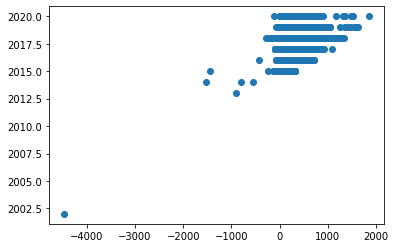

In [73]:
plt.scatter(accidenttoassembly['Time to Assembly'], accidenttoassembly['Year'])
plt.savefig('Images/Accident to Assembly.png')

Negative dates make sense. Reported date selected as beginning Jan 2015, accident may have occured before that date. Same will apply for Occupational Disease. 

In [23]:
# Days to assembly by Occupational Disease
diseasetoassembly = disease_accident_assembly.loc[disease_accident_assembly['Occupational Disease'] == 'Y']
diseasetoassembly.dropna()

,Time to Assembly,Occupational Disease,Accident,Year
109578,-1387.0,Y,N,2012
258403,-2066.0,Y,N,2010
373711,-1028.0,Y,N,2012
375579,-1755.0,Y,N,2011
544612,-3040.0,Y,N,2008
...,...,...,...,...
1024624,15.0,Y,N,2018
1024650,36.0,Y,N,2018
1025125,-21.0,Y,N,2018
1026405,542.0,Y,N,2018


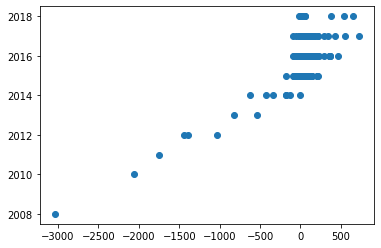

In [72]:
plt.scatter(diseasetoassembly['Time to Assembly'], diseasetoassembly['Year'])
plt.savefig('Images/Disease to Assembly.png')

Longer period for Occupational illness to be reported makes sense. May take some time for an illness to present (ie mesothelioma or hearing loss). 

In [25]:
# Male v Female claimants
# Total claims
total_claims = recent_wc_data_df['Assembly Date'].count()
total_claims

82660

In [26]:
# Male claimants
male_claims = recent_wc_data_df.loc[recent_wc_data_df['Gender'] == 'M'].count()
male_claims['Claim Identifier']

47598

In [27]:
# Female claimants
female_claims = recent_wc_data_df.loc[recent_wc_data_df['Gender'] == 'F'].count()
female_claims['Claim Identifier']

34549

In [28]:
# Gender not advised
gender_na =  recent_wc_data_df.loc[recent_wc_data_df['Gender'] == 'U'].count()
gender_na['Claim Identifier']

513

In [29]:
male_perc = male_claims['Claim Identifier']/total_claims * 100
male_perc = male_perc.round(2)
male_perc

57.58

In [30]:
female_perc = female_claims['Claim Identifier']/total_claims * 100
female_perc = female_perc.round(2)
female_perc

41.8

In [31]:
gender_na_claims = gender_na['Claim Identifier']/total_claims * 100
gender_na_claims = gender_na_claims.round(2)
gender_na_claims

0.62

Total claims assembled by year. 

In [32]:
recent_wc_data_df.head()

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator,Claim Injury Code,Claim Injury Description,Year,Month
113,152,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,0,2000-01-11,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,1
285,388,WORKERS COMPENSATION CLAIM,NYC,0.0,CASE CANCELLED,1. CANCELLED,0,2000-01-27,NaT,NaT,...,NaN,NaN,Y,N,QUEENS,N,1,CANCELLED,2000,1
290,394,WORKERS COMPENSATION CLAIM,NYC,0.0,NO FURTHER ACTION,2. NON-COMP,0,2000-01-27,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,1
378,512,WORKERS COMPENSATION CLAIM,NYC,0.0,CASE CANCELLED,1. CANCELLED,0,2000-02-02,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,1,CANCELLED,2000,2
415,561,WORKERS COMPENSATION CLAIM,NYC,0.0,ADMINISTRATIVELY CLOSED,2. NON-COMP,0,2000-02-07,NaT,NaT,...,NaN,NaN,Y,N,NEW YORK,N,2,NON-COMP,2000,2


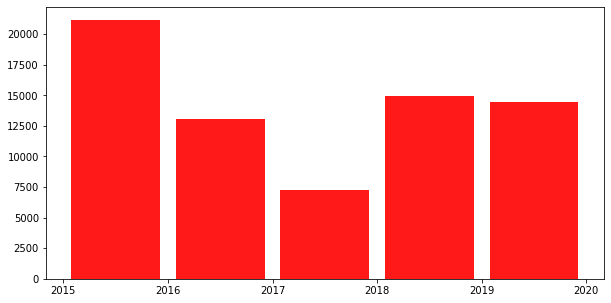

In [71]:
plt.figure(figsize=(10,5))
bins = [2015, 2016, 2017, 2018, 2019, 2020]
n, bins, patches = plt.hist(x=recent_wc_data_df['Year'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2015 to 2019 Claims.png')

In [34]:
# 2015 claims
claims_2015 = recent_wc_data_df.loc[recent_wc_data_df['Year'] == 2015]
claims_2015

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury,COVID-19 Indicator,Claim Injury Code,Claim Injury Description,Year,Month
973726,3895060,WORKERS COMPENSATION CLAIM,NYC,0.00,CASE CANCELLED,1. CANCELLED,0,2015-01-05,NaT,NaT,...,NaN,NaN,Y,N,KINGS,N,1,CANCELLED,2015,1
973728,3895075,WORKERS COMPENSATION CLAIM,ROCHESTER,811.53,NO FURTHER ACTION,4. TEMPORARY,54,2015-01-05,2015-01-13,2015-06-30,...,10.0,176.0,N,Y,MONROE,N,4,TEMPORARY,2015,1
973753,3895336,WORKERS COMPENSATION CLAIM,ALBANY,660.00,NO FURTHER ACTION,3. MED ONLY,55,2015-01-05,2015-01-02,2015-12-11,...,NaN,340.0,Y,N,ORANGE,N,3,MED ONLY,2015,1
973782,3895721,WORKERS COMPENSATION CLAIM,SYRACUSE,0.00,NO FURTHER ACTION,3. MED ONLY,46,2015-01-05,2015-01-03,2015-06-09,...,NaN,155.0,Y,N,HERKIMER,N,3,MED ONLY,2015,1
973786,3895764,WORKERS COMPENSATION CLAIM,HAUPPAUGE,0.00,ADMINISTRATIVELY CLOSED,2. NON-COMP,38,2015-01-05,2015-01-02,NaT,...,NaN,NaN,Y,N,SUFFOLK,N,2,NON-COMP,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007901,4351500,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NEWLY ASSEMBLED,2. NON-COMP,39,2015-02-10,2015-02-06,NaT,...,NaN,NaN,Y,N,RENSSELAER,N,2,NON-COMP,2015,2
1007903,4351521,WORKERS COMPENSATION CLAIM,ALBANY,0.00,NEWLY ASSEMBLED,2. NON-COMP,26,2015-02-10,2015-02-04,NaT,...,NaN,NaN,Y,N,DUTCHESS,N,2,NON-COMP,2015,2
1007904,4351629,WORKERS COMPENSATION CLAIM,NYC,0.00,NO FURTHER ACTION,2. NON-COMP,45,2015-02-10,2015-01-23,NaT,...,NaN,NaN,Y,N,BRONX,N,2,NON-COMP,2015,2
1008038,4355521,WORKERS COMPENSATION CLAIM,NYC,0.00,NEWLY ASSEMBLED,2. NON-COMP,55,2015-02-10,2015-02-03,NaT,...,NaN,NaN,Y,N,QUEENS,N,2,NON-COMP,2015,2


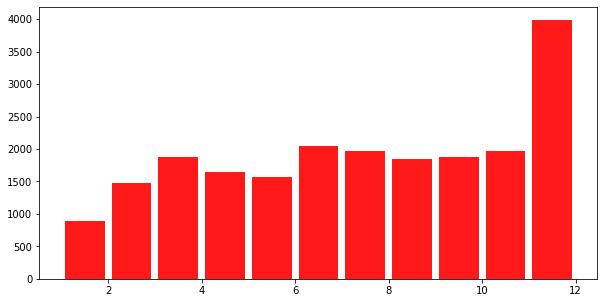

In [64]:
plt.figure(figsize=(10,5))
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n, bins, patches = plt.hist(x=claims_2015['Month'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2015 Claims.png')

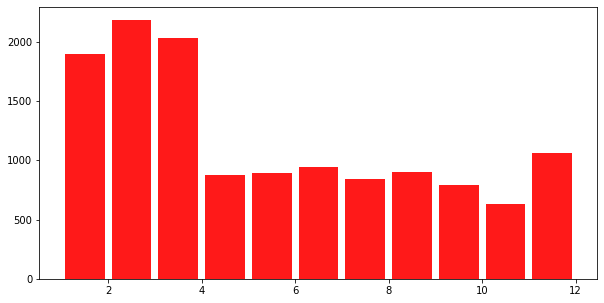

In [65]:
# 2016 claims
claims_2016 = recent_wc_data_df.loc[recent_wc_data_df['Year'] == 2016]
plt.figure(figsize=(10,5))
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n, bins, patches = plt.hist(x=claims_2016['Month'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2016 Claims.png')

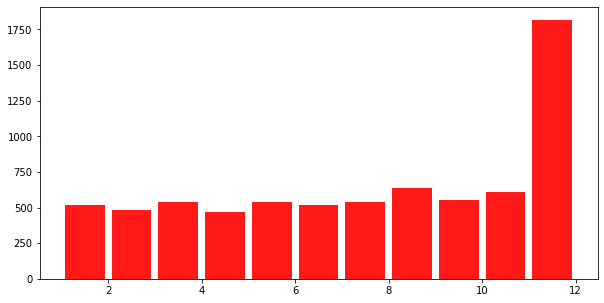

In [66]:
# 2017 claims
claims_2017 = recent_wc_data_df.loc[recent_wc_data_df['Year'] == 2017]
plt.figure(figsize=(10,5))
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n, bins, patches = plt.hist(x=claims_2017['Month'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2017 Claims.png')

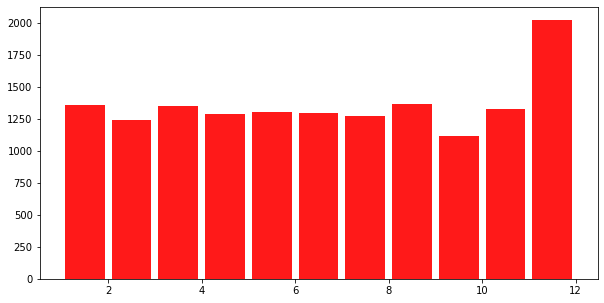

In [67]:
# 2018 claims
claims_2018 = recent_wc_data_df.loc[recent_wc_data_df['Year'] == 2018]
plt.figure(figsize=(10,5))
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n, bins, patches = plt.hist(x=claims_2018['Month'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2018 Claims.png')

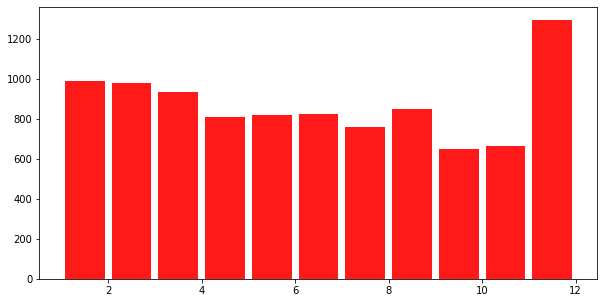

In [68]:
# 2019 claims
claims_2019 = recent_wc_data_df.loc[recent_wc_data_df['Year'] == 2019]
plt.figure(figsize=(10,5))
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n, bins, patches = plt.hist(x=claims_2019['Month'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2019 Claims.png')

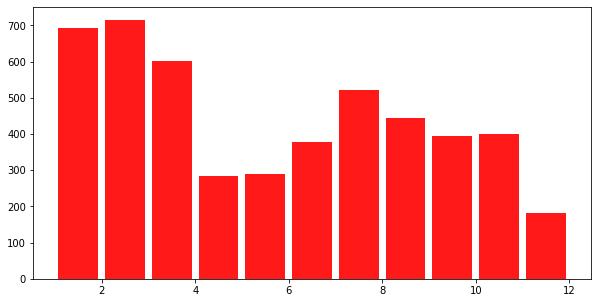

In [69]:
# 2020 claims
claims_2020 = recent_wc_data_df.loc[recent_wc_data_df['Year'] == 2020]
plt.figure(figsize=(10,5))
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n, bins, patches = plt.hist(x=claims_2020['Month'], bins = bins, color='red', alpha=0.9, rwidth=0.85)

plt.savefig('Images/2020 Claims.png')

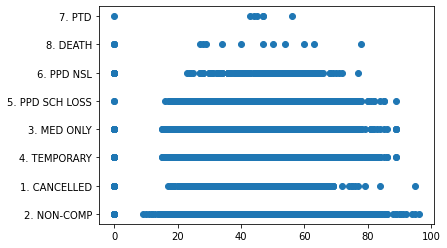

In [70]:
# Claim injury type by age 
acc_by_age = recent_wc_data_df.loc[recent_wc_data_df['Age at Injury'] < 20]
acc_by_age
plt.scatter(recent_wc_data_df['Age at Injury'], recent_wc_data_df['Claim Injury Type'])

plt.savefig('Images/Claim injury type by age.png')

Use machine learning to predict outcome of a claim (ie comp, non-comp etc). 

In [42]:
from sklearn import tree

In [43]:
test_df = pd.DataFrame({'Assembly Date': wc_data_df['Assembly Date'],
                        'Year': recent_wc_data_df['Year'],
                        'Body Part Code': wc_data_df['OIICS Part Of Body Code'],
                        'Nature of Injury': wc_data_df['OIICS Nature of Injury Code'],
                        'Event Exposure': wc_data_df['OIICS Injury Source Code'], 
                        'Claim Injury Code': wc_data_df['Claim Injury Code']
                        })

test_df = test_df[test_df['Year'] == 2015]

test_df

,Assembly Date,Year,Body Part Code,Nature of Injury,Event Exposure,Claim Injury Code
973726,2015-01-05,2015.0,NaN,NaN,NaN,1
973728,2015-01-05,2015.0,32.0,12.0,56.0,4
973753,2015-01-05,2015.0,NaN,NaN,NaN,3
973782,2015-01-05,2015.0,NaN,NaN,NaN,3
973786,2015-01-05,2015.0,NaN,NaN,NaN,2
...,...,...,...,...,...,...
1007901,2015-02-10,2015.0,NaN,NaN,NaN,2
1007903,2015-02-10,2015.0,NaN,NaN,NaN,2
1007904,2015-02-10,2015.0,NaN,NaN,NaN,2
1008038,2015-02-10,2015.0,NaN,NaN,NaN,2


In [44]:
test_df = test_df.dropna()
test_df

,Assembly Date,Year,Body Part Code,Nature of Injury,Event Exposure,Claim Injury Code
973728,2015-01-05,2015.0,32.0,12.0,56.0,4
973855,2015-01-06,2015.0,8.0,4.0,62.0,4
973856,2015-01-06,2015.0,23.0,2.0,56.0,4
973878,2015-01-06,2015.0,33.0,4.0,99.0,4
973908,2015-01-07,2015.0,8.0,8.0,41.0,4
...,...,...,...,...,...,...
987865,2015-07-31,2015.0,41.0,2.0,33.0,4
988296,2015-02-10,2015.0,38.0,2.0,13.0,5
988750,2015-08-05,2015.0,34.0,1.0,82.0,5
988753,2015-08-05,2015.0,23.0,4.0,82.0,4


In [45]:
target = test_df['Claim Injury Code']
#target_names = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPS SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']
target_names = ['1', '2', '3', '4', '5', '6', '7', '8']

In [46]:
test_df = test_df.drop('Claim Injury Code', axis=1)
test_df = test_df.drop('Assembly Date', axis=1)
test_df = test_df.drop('Year', axis=1)
feature_names = test_df.columns
test_df

,Body Part Code,Nature of Injury,Event Exposure
973728,32.0,12.0,56.0
973855,8.0,4.0,62.0
973856,23.0,2.0,56.0
973878,33.0,4.0,99.0
973908,8.0,8.0,41.0
...,...,...,...
987865,41.0,2.0,33.0
988296,38.0,2.0,13.0
988750,34.0,1.0,82.0
988753,23.0,4.0,82.0


In [47]:
# test_df['Assembly Date'] = pd.to_datetime(test_df['Assembly Date'],infer_datetime_format=True)
# test_df['Year'] = pd.to_datetime(test_df['Year'],infer_datetime_format=True)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(test_df, target, random_state=42)

In [49]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)


0.6866359447004609

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.7235023041474654

In [59]:
# Creating SQLite database
engine = create_engine('sqlite:///recent_wc_data.sqlite', echo=True)
sqlite_connection = engine.connect()

2021-06-09 21:13:20,992 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-06-09 21:13:20,992 INFO sqlalchemy.engine.base.Engine ()
2021-06-09 21:13:20,994 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-06-09 21:13:20,995 INFO sqlalchemy.engine.base.Engine ()


In [60]:
sqlite_table = 'WComp'
recent_wc_data_df.to_sql(sqlite_table, sqlite_connection, if_exists='replace')

2021-06-09 21:13:26,798 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("WComp")
2021-06-09 21:13:26,799 INFO sqlalchemy.engine.base.Engine ()
2021-06-09 21:13:26,801 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("WComp")
2021-06-09 21:13:26,803 INFO sqlalchemy.engine.base.Engine ()
2021-06-09 21:13:26,805 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-06-09 21:13:26,806 INFO sqlalchemy.engine.base.Engine ()
2021-06-09 21:13:26,807 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("WComp")
2021-06-09 21:13:26,809 INFO sqlalchemy.engine.base.Engine ()
2021-06-09 21:13:26,815 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-06-09 21:13:26,816 INFO sqlalchemy.engine.base.Engine ('WComp',)
2021-06-09 21:13:26,818 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("WComp")
202